In [1]:
import numpy as np
import scipy.stats as stats

In [2]:
control = np.array([166, 165, 120,  94, 104, 166,  98,  85,  97,  87, 114, 100, 152,
                    87, 152, 102,  82,  80,  84, 109,  98, 154, 135, 164, 137, 128,
                    122, 146,  86, 146,  85, 101, 109, 105, 163, 136, 142, 144, 140,
                    128, 126, 119, 121, 126, 169,  87,  97, 167,  89, 155])

experimental = np.array([ 83, 100, 123,  75, 130,  77,  78,  87, 116, 116, 141,  93, 107,
                         101, 142, 152, 130, 123, 122, 154, 119, 149, 106, 107, 108, 151,
                         97,  95, 104, 141,  80, 110, 136, 134, 142, 135, 111,  83,  86,
                         116,  86, 117,  87, 143, 104, 107,  86,  88, 124,  76])

In [3]:
print(np.mean(experimental),np.mean(control))
print(np.mean(experimental)-np.mean(control))

111.56 121.38
-9.819999999999993


### H0:the difference between the both groups is 0

### H1:the difference is not 0

In [4]:
def sample_variance(sample_1,sample_2):
    n_1=len(sample_1)
    n_2=len(sample_2)
    mean_1=np.mean(sample_1)
    mean_2=np.mean(sample_2)
    variance_1=np.sum(np.square(sample_1-mean_1))
    variance_2=np.sum(np.square(sample_2-mean_2))
    return (variance_1+variance_2)/(n_1+n_2-2)

In [5]:
sample_variance(experimental,control)

673.7969387755102

In [6]:
def t_statistic(experimental,control):
    s_squared=sample_variance(experimental,control)
    mean_1=np.mean(experimental)
    mean_2=np.mean(control)
    n_1=len(experimental)
    n_2=len(control)
    std=np.sqrt(s_squared*(1/n_1+1/n_2))
    return (mean_1 - mean_2)/std
t_stats=t_statistic(experimental,control)
t_stats

-1.8915462966190273

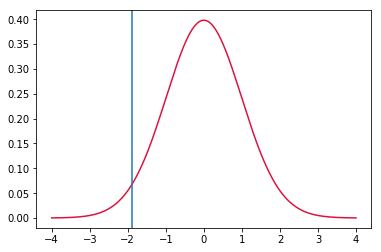

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
# generate points on the x axis between -4 and 4:
xpoints = np.linspace(-4, 4, 500)

# use stats.t.pdf to get values on the probability density function for the t-distribution
# the second argument is the degrees of freedom: n1 + n2 - 2
ypoints = stats.t.pdf(xpoints, (50+50-2), 0, 1)
plt.plot(xpoints,ypoints,color='crimson')
plt.axvline(t_stats)

In [8]:
#prop of lower tail
ltail=stats.t.cdf(t_stats,(50+50-2),0,1)
ltail

0.030752120336265197

In [9]:
#prop of upper tail
rtail=1-stats.t.cdf(-t_stats,(50+50-2),0,1)
rtail

0.030752120336265176

In [10]:
ltail+rtail

0.06150424067253037

In [25]:
s,p=stats.ttest_ind_from_stats(mean1=1.5,std1=0.8,nobs1=30,mean2=1.2,std2=0.2,nobs2=30)
p

0.05101450278530642

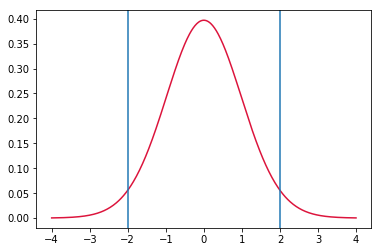

In [26]:
# generate points on the x axis between -4 and 4:
xpoints = np.linspace(-4, 4, 500)

# use stats.t.pdf to get values on the probability density function for the t-distribution
# the second argument is the degrees of freedom: n1 + n2 - 2
ypoints = stats.t.pdf(xpoints, (25+25-2), 0, 1)
plt.plot(xpoints,ypoints,color='crimson')
plt.axvline(s)
plt.axvline(-s)

In [29]:
ltail=stats.t.cdf(s,(30+30-2),0,1)
rtail=1-stats.t.cdf(-s,(30+30-2),0,1)

In [30]:
ltail+rtail

1.9489854972146936